<a href="https://colab.research.google.com/github/Dhruvjain484/Machine-learning-projects-for-beginner-Part-1/blob/main/combined%20cycle%20power/%20combined_cycel_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the dataset

In [31]:
dataset = pd.read_csv('combined cycle power.csv')
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [32]:
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


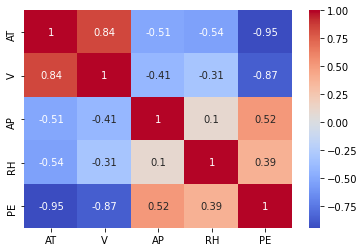

In [33]:
sns.heatmap(dataset.corr(), annot = True, cmap= 'coolwarm')

In [34]:
# From the diagram, it can be concluded that:
# 1.) PE has a positive correlation with AP and RH
# 2.) PE has a strong negative correlation with AT and V

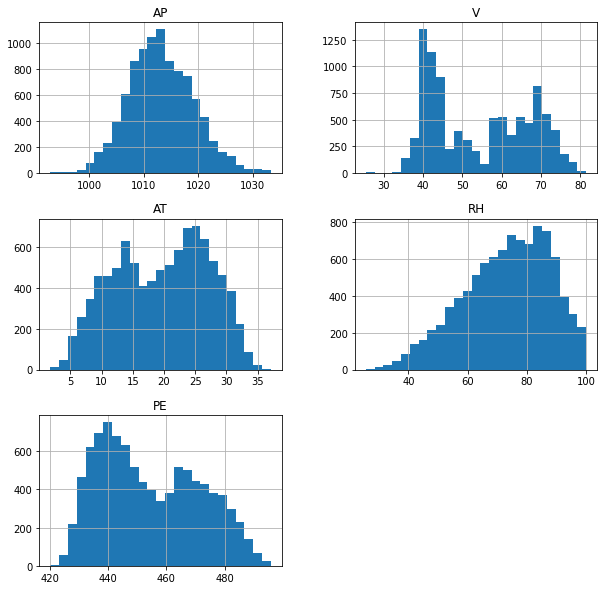

In [35]:
dataset[['AP', 'V', 'AT', 'RH', 'PE']].hist(bins= 25, figsize = (10,10)); #histogram tells the frequency of occurrence of the feature values

In [36]:
# From the above diagram, it can be concluded that:
# 1.) AP has normal distribution
# 2.) V, AT, PE shows bimodal distribution
# 3.) RH is left skewed

In [37]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Splitting the dataset

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##Training the regression model

In [39]:
# from xgboost import XGBRegressor 
# regressor = XGBRegressor()

# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)

# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##Testing the regression model

In [40]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)


array([[431.23, 433.67],
       [460.01, 456.88],
       [461.14, 461.22],
       ...,
       [473.26, 470.08],
       [438.  , 439.27],
       [463.28, 461.68]])

##Checking the accuracy

In [41]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
accuracy

0.9612084910415819

In [42]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred)
error

11.34604449111808

##K-Fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, x, y)
score.mean()

0.9577440804963409